<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

# plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print('There are ', len(x_train), 'images in the training set')
print('There are ', len(x_test), 'images in the test set')

There are  60000 images in the training set
There are  10000 images in the test set


In [5]:
# Checking the shape of one image
print('x_train_shape', x_train[1].shape)
print('x_test_shape', x_test[1].shape)

x_train_shape (28, 28)
x_test_shape (28, 28)


In [6]:
x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

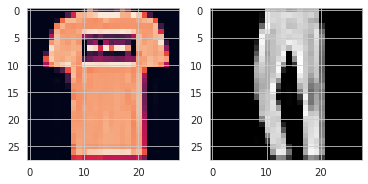

In [7]:
plt.subplot(1,2,1)
plt.imshow(x_train[1])

plt.subplot(1,2,2)
plt.imshow(x_test[5], cmap='gray')

In [8]:
print(y_train.shape)

(60000,)


In [9]:
print(y_train[0])
print(y_train)

9
[9 0 0 ... 3 0 5]


In [10]:
# pd.Series(y_train.flatten()).value_counts()
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [11]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

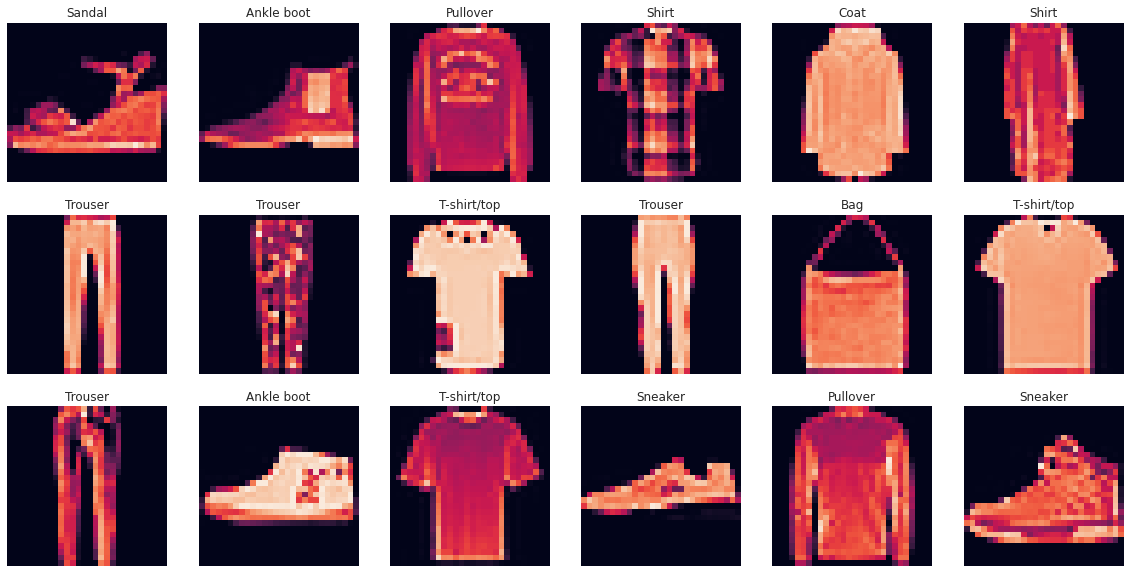

In [12]:
plt.figure(figsize=(20,10))
for i in range(18):
  rand_index = int(np.random.randint(low=0, high=60000, size=1))
  plt.subplot(3, 6, i+1)
  plt.axis('off')
  plt.title(classes[int(y_train[rand_index])])
  plt.imshow(x_train[rand_index])

Text(0.5, 1.0, 'Sneaker')

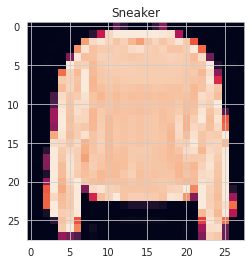

In [13]:
plt.imshow(x_train[7])
plt.title(classes[int(y_train[rand_index])])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [14]:
x_train[7].min(), x_train[7].max()

(0, 255)

In [15]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [16]:
x_train[7].min(), x_train[7].max()

(0.0, 1.0)

Text(0.5, 1.0, 'Sneaker')

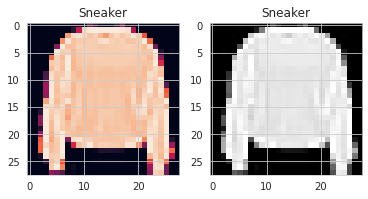

In [17]:
plt.subplot(1,2,1)
plt.imshow(x_train[7])
plt.title(classes[int(y_train[rand_index])])

plt.subplot(1,2,2)
plt.imshow(x_train[7], cmap='gray')
plt.title(classes[int(y_train[rand_index])])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [18]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [19]:
X_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [20]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [21]:
from tensorflow.keras.utils import to_categorical

In [22]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [23]:
Y_train[7]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [25]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu')) # stride = 1, padding = valid 
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) # stride = 1, padding = valid 
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu')) # stride = 1, padding = valid 
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Number of parameter in CL

((n x m x l) + 1) x k

n x m = filter shape
l = number of input channel (feature maps as input)
k = number of output channel (feature maps as output)

- conv2D = ((28+(2*0)-3)/1) +1 = 26 ---- (26, 26, 28(Filter)) ---- ((3x3x1)+1)x28)=280 Param
- max_pooling2d = ((28+(2*0)-2)/1) +1=25 ---- (25, 25, 28(Filter))
- Faltten shape (28X28X25=17500)

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 128)      0

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=2, restore_best_weights=True)

In [29]:
model.fit(x_train, Y_train, batch_size=32, epochs=20, validation_data=(x_test, Y_test), callbacks=[early_stop])

Epoch 1/20
1875/1875 [==============================] - 32s 9ms/step - loss: 0.4114 - accuracy: 0.8527 - val_loss: 0.3175 - val_accuracy: 0.8806
Epoch 2/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2824 - accuracy: 0.9008 - val_loss: 0.2802 - val_accuracy: 0.9018
Epoch 3/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2609 - accuracy: 0.9086 - val_loss: 0.2892 - val_accuracy: 0.8996
Epoch 4/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2574 - accuracy: 0.9120 - val_loss: 0.2975 - val_accuracy: 0.8970


In [30]:
model.metrics_names

['loss', 'accuracy']

In [31]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.4114,0.8527,0.3175,0.8806
1,0.2824,0.9008,0.2802,0.9018
2,0.2609,0.9086,0.2892,0.8996
3,0.2574,0.9120,0.2975,0.8970


**TASK 7: Plot values of metrics you used in your model.**

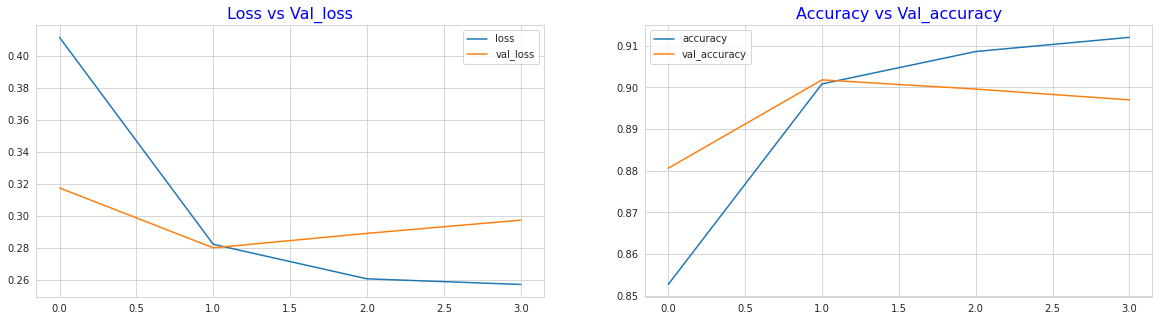

In [32]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(summary[['loss', 'val_loss']])
plt.title("Loss vs Val_loss", fontsize=16, color='blue')
plt.legend(('loss', 'val_loss'))

plt.subplot(1,2,2)
plt.plot(summary[['accuracy', 'val_accuracy']])
plt.title("Accuracy vs Val_accuracy", fontsize=16, color='blue')
plt.legend(('accuracy', 'val_accuracy'));

In [33]:
model.evaluate(x_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2802 - accuracy: 0.9018


[0.28021547198295593, 0.9017999768257141]

[0.31306326389312744, 0.9138000011444092]

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
loss, accuracy = model.evaluate(x_test, Y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.28021547198295593
accuracy :  0.9017999768257141


In [36]:
pred_prob = model.predict(x_test)
pred_prob

array([[1.5356541e-08, 7.9960669e-09, 1.7346689e-07, ..., 5.5879849e-04,
        2.6867741e-07, 9.9896455e-01],
       [3.9200742e-05, 6.0814090e-11, 9.9709499e-01, ..., 6.2766953e-10,
        2.0460247e-06, 2.4954305e-10],
       [5.9530475e-07, 9.9999893e-01, 5.2912391e-08, ..., 5.2318561e-13,
        3.8560461e-08, 1.0827926e-14],
       ...,
       [1.9976863e-08, 9.7769996e-16, 8.2624696e-10, ..., 4.0230250e-12,
        1.0000000e+00, 6.8446880e-16],
       [1.2779351e-05, 9.9994397e-01, 6.8932030e-07, ..., 2.7055480e-09,
        2.5921681e-06, 6.9403949e-10],
       [1.1599334e-03, 2.1425651e-05, 1.6162253e-03, ..., 7.3348023e-02,
        1.0915495e-02, 4.9724686e-04]], dtype=float32)

In [37]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.89      0.85      1000
           3       0.93      0.87      0.90      1000
           4       0.83      0.86      0.85      1000
           5       0.99      0.97      0.98      1000
           6       0.74      0.67      0.70      1000
           7       0.94      0.98      0.96      1000
           8       0.97      0.98      0.97      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



                precision    recall  f1-score   support
           0       0.82      0.91      0.86      1000
           1       0.98      0.98      0.98      1000
           2       0.86      0.86      0.86      1000
           3       0.92      0.92      0.92      1000
           4       0.87      0.85      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.79      0.73      0.76      1000
           7       0.94      0.98      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.97      0.95      0.96      1000
   
    accuracy                           0.91     10000
    macro avg       0.91      0.91      0.91     10000
    weighted avg       0.91      0.91      0.91     10000

In [39]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [40]:
print(confusion_matrix(y_test, y_pred))

[[867   1  24  15   3   0  83   0   7   0]
 [  3 970   2  14   2   0   5   0   4   0]
 [  9   0 889   4  50   0  47   0   1   0]
 [ 26   3  15 867  39   0  45   0   5   0]
 [  1   0  69  11 865   0  52   0   2   0]
 [  0   0   0   0   0 972   0  20   0   8]
 [124   2  91  19  78   0 670   0  16   0]
 [  0   0   0   0   0   1   0 984   0  15]
 [  3   0   8   0   5   2   0   4 978   0]
 [  0   0   0   0   0   6   0  38   0 956]]


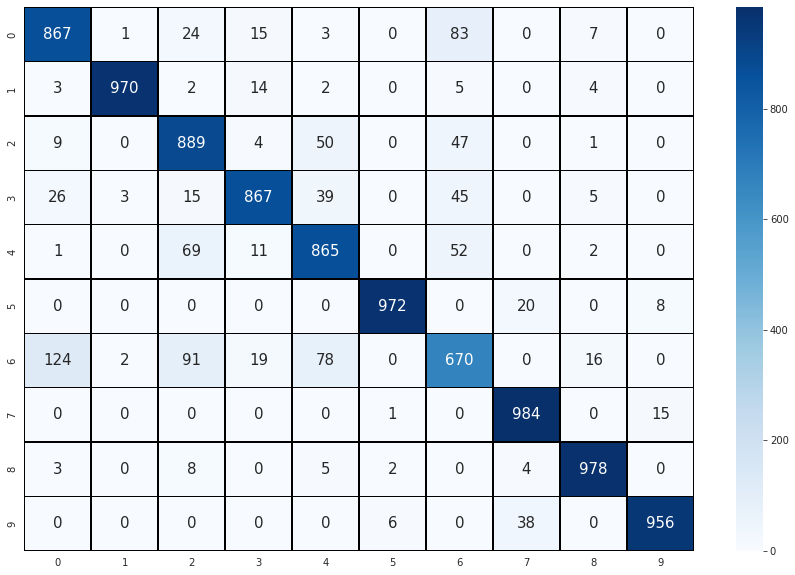

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

## Prediction

In [42]:
my_image = x_test[22]
my_image.shape

(28, 28)

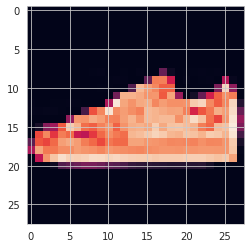

In [43]:
plt.imshow(my_image)

In [44]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

In [45]:
image_prediction

array([[2.8480290e-06, 1.4301770e-07, 6.5248474e-05, 6.0254285e-07,
        5.6064305e-06, 6.6265785e-03, 1.1580544e-05, 9.9280691e-01,
        2.5606263e-05, 4.5478618e-04]], dtype=float32)

In [46]:
result = np.argmax(image_prediction, axis=1)
result

array([7])

In [47]:
classes[int(result)]

'Sneaker'

In [48]:
model.save("Assign-2.h5")